# Лабораторная работа №1. Звуки и сигналы
## Жилкина Лада, 5130901/10202

## Упраженение 1.2

In [2]:
import os
import wget

if not os.path.exists('../thinkdsp.py'):
    wget.download('https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py')

Скачаем с сайта freesound.org образец звука и исследуем его различными способами. При исследовании будем использовать библиотеку thinkdsp. Для начала представим исследуемый образец в виде волны (wave).

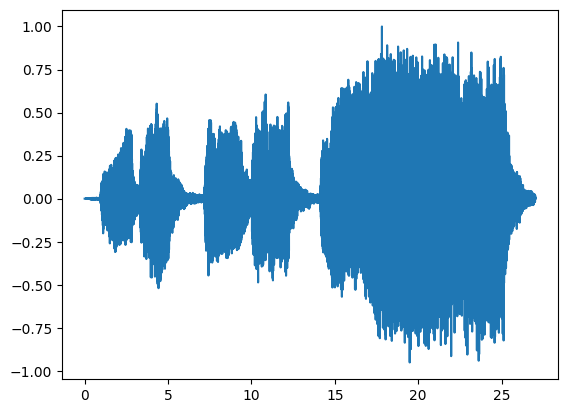

In [8]:
import sys
sys.path.append('../')
from thinkdsp import read_wave
from IPython.display import Audio
wave = read_wave('bach-toccata-and-fugue.wav')
audio = Audio(data=wave.ys, rate=wave.framerate)
wave.plot()
audio

Выделим промежуток длительностью 0.5 секунды - с 20.0 по 20.5 и будем его исследовать.

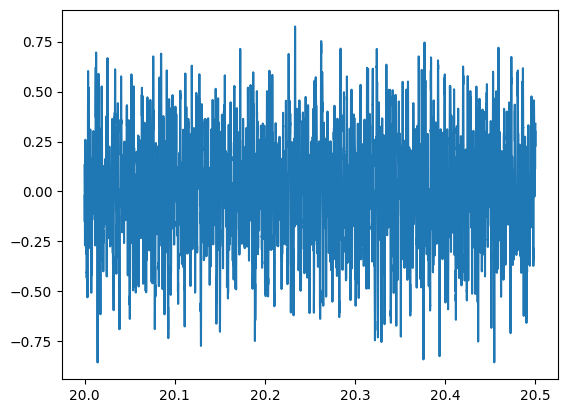

In [9]:
segment = wave.segment(start = 20, duration= 0.5)
audio1 = Audio(data=segment.ys, rate=segment.framerate)
segment.plot()
audio1

Получим спектр выбранного фрагмента.

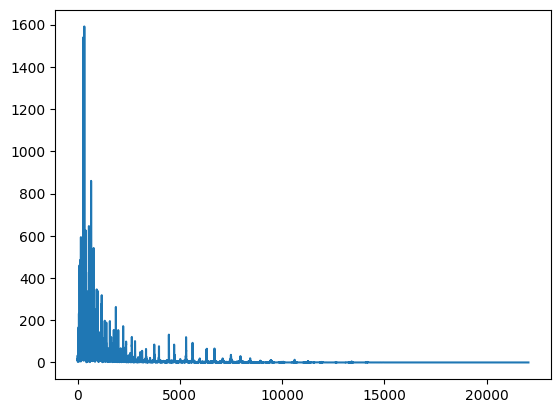

In [10]:
spectrum = segment.make_spectrum()
spectrum.plot()

Судя по полученному графику, в выбранном фрагменте преобладают низкие и средние частоты. Ограничим рассматриваемую частоту до 1000 Гц, чтобы посмотреть, какие частоты являются доминирующими в данном фрагменте. 

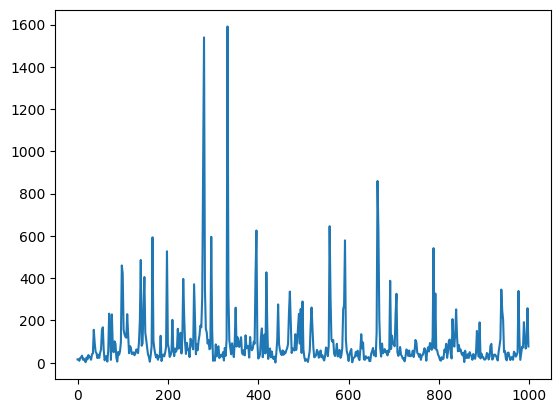

In [11]:
spectrum.plot(high=1000)

По графику сигнала waveform никак нельзя судить о форме сигнала, так как взят слишком большой период времени.
Получим список пиковых частот.

In [12]:
spectrum.peaks()[:5]

[(1591.1489744135229, 332.0),
 (1539.424160857704, 280.0),
 (916.7653097267232, 278.0),
 (859.8556234580794, 664.0),
 (645.8321244872704, 558.0)]

Основная частота равна 332 Гц, что примерно соответствует ноте Е4 (Ми первой октавы).
Отбросим высокие частоты (более 5000 Гц) и послушаем, что получилось.

In [13]:
spectrum.low_pass(5000)
spectrum.make_wave().make_audio()

Звук стал немного ниже. Теперь отбросим низкие частоты (ниже 1500 Гц) и послушаем, что получилось.

In [14]:
spectrum.high_pass(1500)
spectrum.make_wave().make_audio()

Звук стал выше. Теперь, используя band_stop, отбросим все частоты вне диапазона 500Гц - 2000Гц.

In [15]:
spectrum.band_stop(500,2000)
spectrum.make_wave().make_audio()

Звук стал ещё выше.

## Упражнение 1.3
Создадим обьекты SinSignal и CosSignal, просумируем их. Получим сложный сигнал.


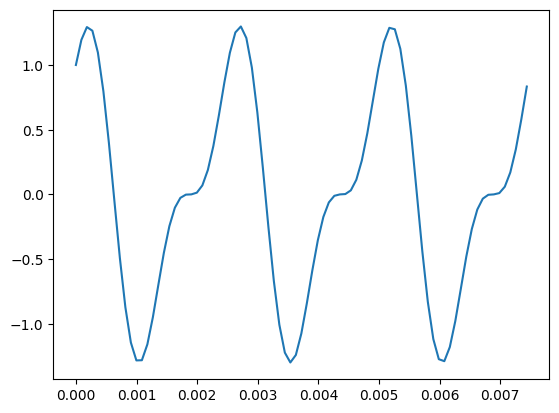

In [16]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=400, amp=1.0, offset=0)
sin_sig = SinSignal(freq=800, amp=0.5, offset=0)
mix = sin_sig + cos_sig
mix.plot()
wave2 = mix.make_wave()
audio2 = Audio(data=wave2.ys, rate=wave2.framerate)
audio2

Вычислим спектр сигнала и распечатаем его.

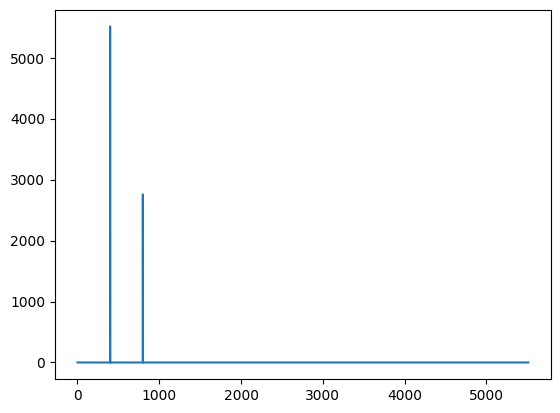

In [17]:
spectrum2 = mix.make_wave().make_spectrum()
spectrum2.plot()

Если добавить сигнал, не кратный 100, можно услышать его как выделяющийся звук.

In [18]:
mix += SinSignal(freq=250)
mix.make_wave().make_audio()

## Упражнение 1.4
Напишем функцию stretch, ускоряющую или замедляющую сигнал.

In [19]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

Протестируем её. Длительность аудиозаписи увеличится в два раза за счёт увеличения массива ts моментов выборки и преобразования сигнала. Запись замедляется за счёт уменьшения частоты фреймов.

In [20]:
stretch(wave, 2)
wave.make_audio()